<b> About me: </b> Experienced Data enthusiast here. Currently working for Roche Pharmaceutical firm. <br>
[🔗 LinkedIn](https://www.linkedin.com/in/praveen-sundar-ravi-0bb192182/)

<b> In this workbook </b>, you can find the outcomes of certain activities such as \
&emsp;&emsp;&emsp;   (i) bagging model vs stand alone model \
&emsp;&emsp;&emsp;    (ii) Implementation of Naive bayes model \
&emsp;&emsp;&emsp;    (ii) Use case of Z score test to remove outliers \
&emsp;&emsp;&emsp;    (iii) Use case of Randomsearchcv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from collections import Counter
from numpy import where, mean
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [67]:
df = pd.read_csv(r'heart disease.csv')
df_N = df
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [68]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [69]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Removing outliers using z-score Way 1:

In [23]:
df_N['Age_zs'] = (df_N.Age - df_N.Age.mean())/(df_N.Age.std())

# setting limit of z score between -3 & 3:
df_N = df_N[(df_N['Age_zs'].between(-3,3))]

df_N

### Removing outliers using z-score Way 2 (using scipy):

In [70]:
from scipy.stats import zscore

# df_obj = df.select_dtypes(exclude=object)
df_obj_exl = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# applying zscore to all columns if you want
# df_zscore = df[df_obj_exl].apply(zscore)

def outlier_rem(data):
    temp_list = []
    for column in df_obj_exl:
        data[column+'zs'] = zscore(data[column])
        temp_list.append(column+'zs')
        data = data[(data[column+'zs'].between(-3,3))]
    data = data.drop(temp_list, axis=1)
    data.reset_index(inplace=True,drop=True)
    return data

# pass your dataframe here
df_New = outlier_rem(df)

print(df_New)
df_New

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
894   45   M            TA        110          264          0     Normal   
895   68   M           ASY        144          193          1     Normal   
896   57   M           ASY        130          131          0     Normal   
897   57   F           ATA        130          236          0        LVH   
898   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
895,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
896,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
897,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [71]:
print('No. of patients without Heart disease:',len(df_New[df_New['HeartDisease']==0]))
print('No. of patients with Heart disease:',len(df_New[df_New['HeartDisease']==1]))

No. of patients without Heart disease: 407
No. of patients with Heart disease: 492


<b> <i>-->From the above counts, we can say that the dataset don't need any over or under sampling </i> </b> 

In [72]:
X = df_New.drop(['HeartDisease'],axis=1)
y = df_New['HeartDisease']

# test-train split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

In [73]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat
1,61,M,ASY,138,166,0,LVH,125,Y,3.6,Flat
2,54,M,ASY,150,365,0,ST,134,N,1.0,Up
3,41,M,ATA,125,269,0,Normal,144,N,0.0,Up
4,57,M,ASY,132,207,0,Normal,168,Y,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
714,62,M,ASY,135,297,0,Normal,130,Y,1.0,Flat
715,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat
716,46,M,ATA,140,275,0,Normal,165,Y,0.0,Up
717,62,F,ASY,140,268,0,LVH,160,N,3.6,Down


### ONE HOT ENCODING

In [74]:
# One Hot Encoding function to encode all categorical string columns 

def onehotencoding(dataframe_name):
    column_names_obj = dataframe_name.select_dtypes(include=object)
    ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
    df_N=dataframe_name
    for i in column_names_obj:
        feature_cols = ohe.fit_transform(dataframe_name[[i]]).toarray()
        feature_cols_names = np.array(ohe.categories_).ravel()
        feature_cols_names = feature_cols_names[1:]
        feature = pd.DataFrame(feature_cols,columns=feature_cols_names)
        df_N = pd.concat([df_N,feature],axis=1)
    df_N = df_N.drop(column_names_obj, axis=1) #dropping categorical columns
    return df_N


In [75]:
#Pass your dataset here ⬇️
df_enc_train = onehotencoding(X_train)
print(df_enc_train)
df_enc_test = onehotencoding(X_test)


     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak    M  ATA  NAP  \
0     41        110          289          0    170      0.0  1.0  0.0  0.0   
1     61        138          166          0    125      3.6  1.0  0.0  0.0   
2     54        150          365          0    134      1.0  1.0  0.0  0.0   
3     41        125          269          0    144      0.0  1.0  1.0  0.0   
4     57        132          207          0    168      0.0  1.0  0.0  0.0   
..   ...        ...          ...        ...    ...      ...  ...  ...  ...   
714   62        135          297          0    130      1.0  1.0  0.0  0.0   
715   54        130          294          0    100      0.0  0.0  0.0  1.0   
716   46        140          275          0    165      0.0  1.0  1.0  0.0   
717   62        140          268          0    160      3.6  0.0  0.0  0.0   
718   62        150          244          0    154      1.4  0.0  0.0  0.0   

      TA  Normal   ST    Y  Flat   Up  
0    0.0     1.0  0.0  

### SCALING

In [80]:
def scaling_process(dataframe):

    df_scaling = dataframe
    
#     Please pass the list of numerical features for which you want to apply scaling ⬇️
    scaled_features = scaling.fit_transform(df_scaling[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']])

    scaled_features_names = scaling.feature_names_in_.tolist()
    scaled_features_df = pd.DataFrame(scaled_features,columns=scaled_features_names)
    df_scaled = df_scaling.drop(columns=scaled_features_names)
    df_enc = pd.concat([df_scaled,scaled_features_df], axis=1)

    return df_enc

In [81]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
df_enc_train_scl = scaling_process(df_enc_train)
print(df_enc_train_scl)
df_enc_test_scl = scaling_process(df_enc_test)

       M  ATA  NAP   TA  Normal   ST    Y  Flat   Up       Age  RestingBP  \
0    1.0  0.0  0.0  0.0     1.0  0.0  0.0   1.0  0.0 -1.328136  -1.286021   
1    1.0  0.0  0.0  0.0     0.0  0.0  1.0   1.0  0.0  0.800553   0.357069   
2    1.0  0.0  0.0  0.0     0.0  1.0  0.0   0.0  1.0  0.055512   1.061251   
3    1.0  1.0  0.0  0.0     1.0  0.0  0.0   0.0  1.0 -1.328136  -0.405794   
4    1.0  0.0  0.0  0.0     1.0  0.0  1.0   0.0  1.0  0.374815   0.004979   
..   ...  ...  ...  ...     ...  ...  ...   ...  ...       ...        ...   
714  1.0  0.0  0.0  0.0     1.0  0.0  1.0   1.0  0.0  0.906987   0.181024   
715  0.0  0.0  1.0  0.0     0.0  1.0  1.0   1.0  0.0  0.055512  -0.112385   
716  1.0  1.0  0.0  0.0     1.0  0.0  1.0   0.0  1.0 -0.795964   0.474433   
717  0.0  0.0  0.0  0.0     0.0  0.0  0.0   0.0  0.0  0.906987   0.474433   
718  0.0  0.0  0.0  0.0     1.0  0.0  1.0   1.0  0.0  0.906987   1.061251   

     Cholesterol  FastingBS     MaxHR   Oldpeak  
0       0.861142  -0.5242

In [82]:
X_train = df_enc_train_scl
X_test = df_enc_test_scl

### Support Vector Machine (SVM) model

In [83]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [84]:
model.score(X_train,y_train)

0.8984700973574409

In [85]:
model.score(X_test,y_test)

0.9111111111111111

<b> <i>--> When I performed SVM modeling without scaling, I clearly saw a drop of around 15-20% accuracy. </i> </b>

### Naive Bayes model

In [90]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8525730180806675
0.9


<b> <i> • Here we see some overfitting as train set accuracy is higher than test set. Reason might be the fact that Naive bayes strictly consider all features other than target feature as independent features. \
• To avoid these kind of problems, we use L1 or L2 regularisation techniques or some bagging methods which we used down below</i> </b> 

In [86]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10)
""" n_estimators --> This's the no. of times the model gonna create different sest of random data and give us
                     mean of all the outcomes. """
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [87]:
print(model_RF.score(X_train,y_train))
print(model_RF.score(X_test,y_test))

0.9930458970792768
0.8888888888888888


#### Below, I've used random search cv to find which is best combination of hyperparameter for lasso model

In [92]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = { 'n_estimators': list(range(1,100)), 
               'random_state':list(range(1,100))}
randomCV = RandomizedSearchCV(BaggingClassifier(), param_distributions=param_dist, n_iter=8,cv=3,random_state=42)

randomCV.fit(X_train,y_train)
print(randomCV.best_params_)

{'random_state': 71, 'n_estimators': 45}


### Bagging method (using SVM model):

In [88]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
                base_estimator=SVC(), 
                n_estimators=45, 
                max_samples=0.8, 
                oob_score=True,
                random_state=71)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8525730180806675

In [ ]:
""" OOB (out-of-bag) score is a performance metric for a machine learning model, specifically for ensemble models 
    such as random forests. It is calculated using the samples that are not used in the training of the model, 
    which is called out-of-bag samples. """

In [93]:
from sklearn.metrics import confusion_matrix
y_pred = bag_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  8],
       [ 9, 93]])

Text(20.72222222222222, 0.5, 'Truth')

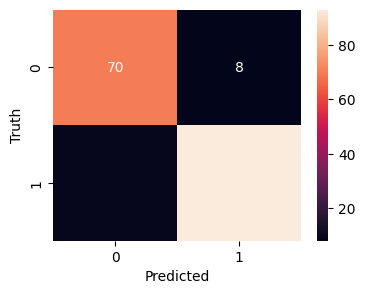

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
bag_model.score(X_test, y_test)

0.9055555555555556

#### Conclusion:

<b> <i>--> Here we can clearly see 0.5% to 2% increase in accuracy score for bagging model compared to normal stand alone model. </i> </b> 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <b> <i>   Happy Learning!🙂  </i> </b>